In [ ]:
# 막대 그래프는 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현
# 높이의 상대적 길이 차이를 통해 값의 크고 작으믈 설명
# 세로형, 가로형 두 종류 있음

# 세로형은 시간적으로 차이가 나는 두 점에서 데이터 값이 차이를 잘 설명, 시계열 데이터를 표현하는데 적합
# plot () 메소드에 kind = 'bar' 옵션을 넣는다

C:\Users\mpm51\AppData\Local\Temp\ipykernel_30752\1702534484.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_30752\1702534484.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


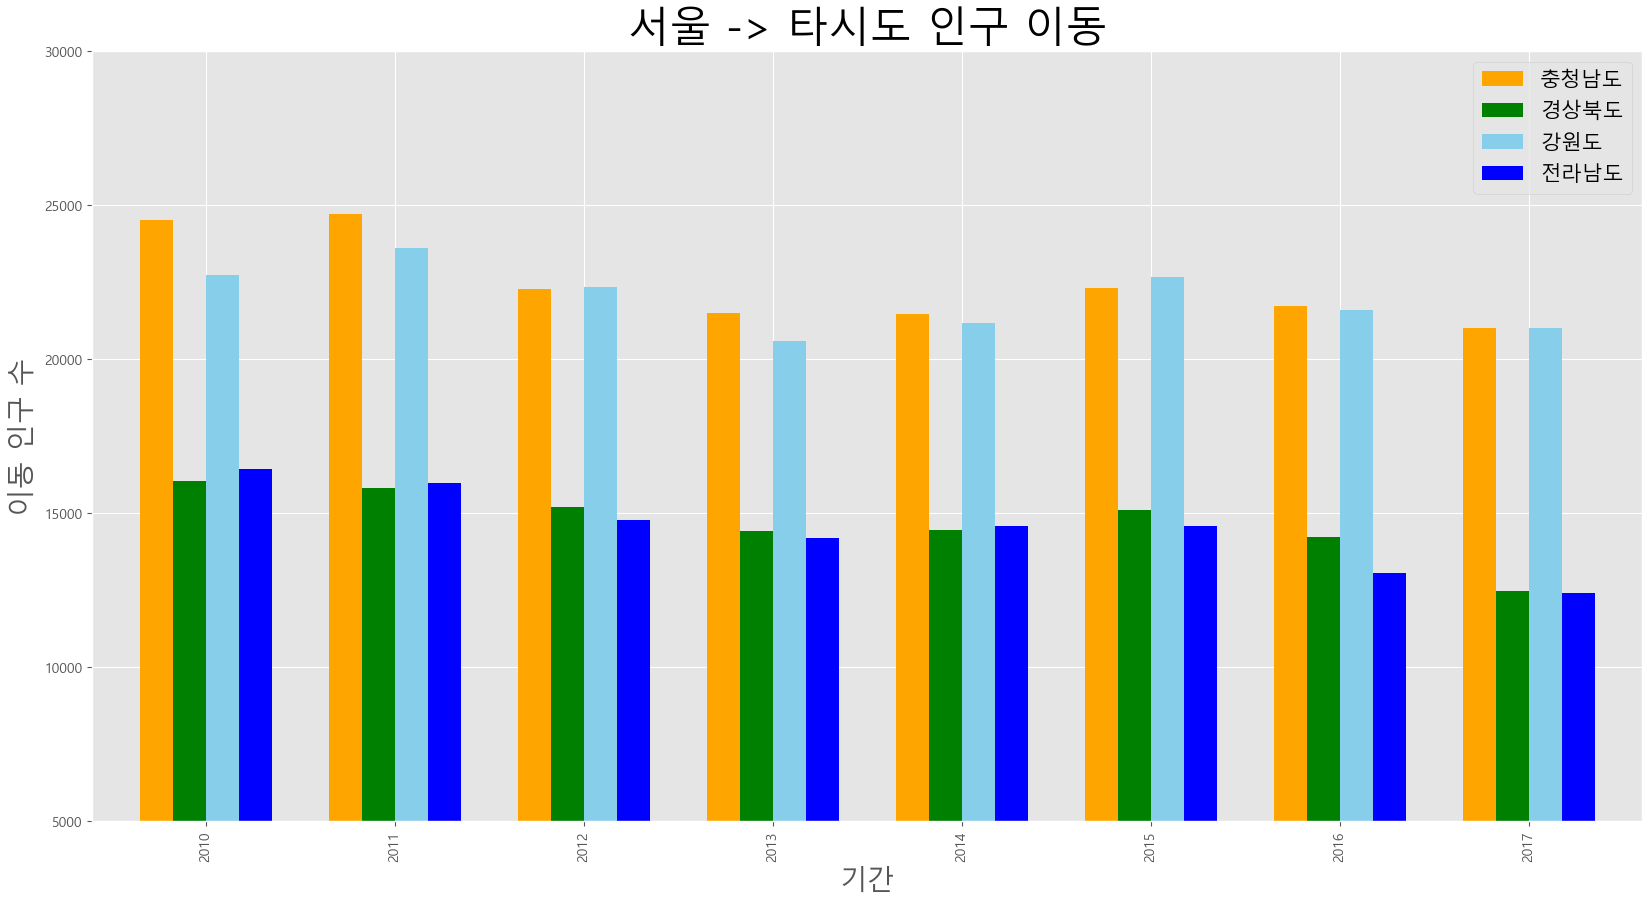

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데인터 값만 선택
sr_one = df_seoul.loc['경기도']

## 서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

## plot() 메소드는 데이터프레임의 행 인덱스를 x축에 배치하고 각 열의 데이터를 독립적인 그래프로 표시
## 연도별 인구 이동의 변화를 그리기 위해서는 연도를 x축에 위치시켜야하고, 현재의 데이터프레임 구조를 그대로 사용할 수 없다
## 따라서 데이터프레임을 전환하여 행 인덱스에 연도, 열 이름에 네 곳의 전입지를 나타내는 구조로 변환한다

df_4 = df_4.transpose()

plt.style.use('ggplot')

df_4.index = df_4.index.map(int)

## 면적 그래프 그리기 # alpha 는 투명도, stacked는 누적되지 않고 서로 겹치도록 표시되어 선 그래프를 동일한 화면에 여러개
# 그린 것 처럼 표시됨
## 면적 그래프 axe 객체 생성
df_4.plot(kind = 'bar', figsize = (20,10), width = 0.7,
          color = ['orange','green','skyblue','blue'])

plt.title('서울 -> 타시도 인구 이동', size = 30)
plt.ylabel('이동 인구 수', size = 20)
plt.xlabel('기간', size = 20)
plt.ylim(5000,30000)
plt.legend(loc = 'best', fontsize = 15)

plt.show()